# Euklidischer Algorithmus

### Aufgabe 1

In [1]:
def gcd(a, b):
    if b == 0:
        return a
    return gcd(b, a % b)

if gcd(282, 240) == 6:
    print("gcd(282, 240) = 6")
if gcd(9**100+1, 10**100+1) == 401:
    print("gcd(9**100+1, 10**100+1) = 401")

gcd(282, 240) = 6
gcd(9**100+1, 10**100+1) = 401


### Aufgabe 2

In [43]:
def n_gcd(a, b):
    if b == 0:
        return 0
    return n_gcd(b, a % b) + 1

print(n_gcd(9**100+1, 10**100+1))

169


### Aufgabe 3

In [3]:
from random import randrange

def mean_gcd(anz, n):
    return sum(n_gcd(randrange(n), randrange(n)) for _ in range(anz))/anz

### Aufgabe 4

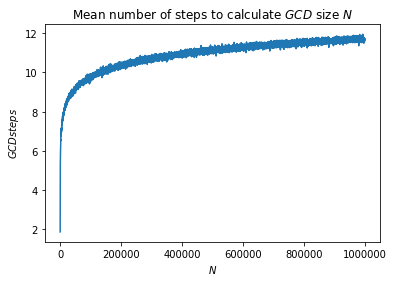

In [4]:
%matplotlib inline

from matplotlib import pyplot as plt

r = range(10, 10**6, 100)
anz = 1000
n_gcds = [mean_gcd(anz, n) for n in r]

plt.plot(list(r), n_gcds)
plt.title("Mean number of steps to calculate $GCD$ size $N$")
plt.xlabel("$N$")
plt.ylabel("$GCD steps$")
plt.show()

Sei $M$ die Menge aller Reihenelemente der Berechnung von $gcd(a, b)$ durch den Euklidischenalgorithmus.

### Worstcase:

$$\forall x \in M: x_{n-2} = x_{n-1}\dot k + x_{n}$$ Bei $k = 1$ sinkt die Reihe am langsamsten $\Rightarrow$ Der langsamste Abstieg erfolgt bei zwei aufeinanderfolgenden Elementen der Fibonaccireihe rekursiv definiert als: $fib_n = fib_{n-1} + fib_{n-2}$

Da bekanntermaßen gilt: $\lim_{n \to \infty}{\frac{fib_n}{fib_{n-1}}} = \varphi$ wobei $\varphi = \frac{1 + \sqrt{5}}{2}$, lässt sich die Reihe veranschaulichen als $fib_n \approx fib_{n-1}\dot \varphi$ und damit ebenfalls als $fib_n \approx \varphi^{n}$. Demnach ist im Worstcase die Anzahl der benötigten Schritte für ein gegebenes Element $x$:
$$n = \log_\varphi (x)$$

### Averagecase:

Seien $f(x) = 1 - x \left \lfloor \frac{1}{x} \right \rfloor$ und $ f^n(x) = f(f^{n-1}(x))$.

Es kann gezeigt werden, dass der Mittelwert der Wachstumsfaktoren $\frac{x_{n}}{x_{n+1}}$ gebildet wird als
$$\lim_{n \to \infty} \frac{ \int_{0}^{1} f^{n}(x) \ dx }{\int_{0}^{1} f^{n+1}(x) \ dx} = \frac{2}{\zeta(2)} = \frac{\pi^2}{3}$$
Womit die Anzahl der Schritte $n$ benötigt zur Berechung des $gcd(x_0, x_1)$ unter Verwendung des euklidischen Algorithmus gegeben ist als
$$n = \log_{\frac{\pi^2}{3}}(x_0)$$
Für dieses Theorem verfüge ich über einen umwerfenden Beweiß, doch leider vermag es die Marge dieser Folie nicht diesen zu fassen.




Im Worstcase konnten wir annehmen, dass $k = 1$ gilt, dies muss jedoch nicht immer der Fall sein. Gesucht wird also ein $\hat{k}$ welches das Mittel für alle $k$ darstellt.

$$n = \log_{\hat{k}(x)} (x) + 1$$

Für zwei Elemente $x \in M$ gilt:


$$x_{n-1} = x_{n}\dot k + x_{n+1}$$

$$\frac{x_{n-1}}{x_{n}} \approx \frac{x_{n}}{x_{n+1}}$$

$$\therefore \ \frac{x_{n}\dot k + x_{n+1}}{x_{n}} \approx \frac{x_{n}}{x_{n+1}}$$

Substituire $x_n = 1$:

$$k + x_{n+1} \approx \frac{1}{x_{n+1}}$$

$$x_{n+1} = \frac{-k}{2} \pm \sqrt{\frac{k^2}{4}+1}$$

Es gilt:

$$ 1 \mod x = 1 - x \left \lfloor \frac{1}{x} \right \rfloor $$

$$\frac{x_{n}}{x_{n+1}}\approx \frac{\int_{0}^{1}x  \ dx}{\int_{0}^{1} 1 - x \left \lfloor \frac{1}{x} \right \rfloor \ dx} = \\ \frac{\frac{1}{2}}{\sum_{n=1}{\infty} \frac{1}{2n^3 + 4n^2 + 2n}} = \\ \frac{1}{\sum_{n=1}{\infty} \frac{1}{n^3 + 2n^2 + n}} = \frac{6}{12 - \pi^2} $$

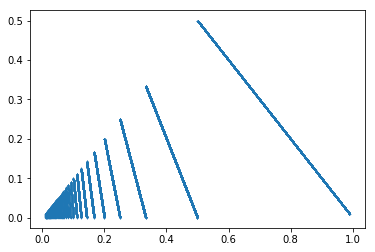

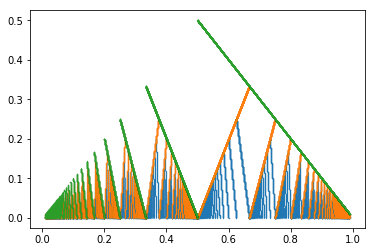

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


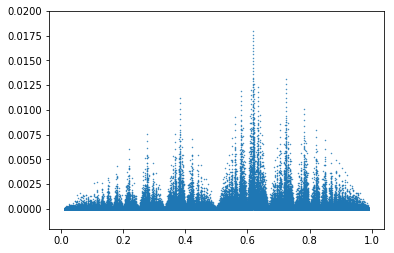

In [48]:
%matplotlib inline

from matplotlib import pyplot as plt
from math import ceil

m = lambda x: 1 - x * trunc(1/x)
div = lambda x: int(1/x)

mod = lambda x: 1%x

from numpy import linspace

ls = linspace(0.01, 0.99, 100000)

def frac(a, n):
    b = [1 for _ in a]
    for _ in range(n):
        a, b = b, [A%B for A, B in zip(a, b)]
    return b

def frac_(a, n):
    b = [1 for _ in a]
    for _ in range(n):
        a, b = b, [A%B for A, B in zip(a, b)]
    return b

#"""
plt.scatter(ls, [mod(x) for x in ls], s=0.1)
plt.show()
plt.scatter(ls, [mod(mod(mod(x))) for x in ls], s=0.01)
plt.scatter(ls, [mod(mod(x)) for x in ls], s=0.01)
plt.scatter(ls, [mod(x) for x in ls], s=0.01)
plt.show()
plt.scatter(ls, frac(list(ls), 9), s=0.2)
plt.show()
#"""

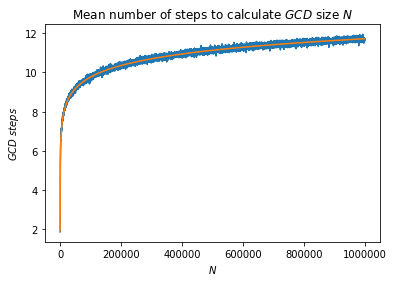

In [49]:
from math import log, sqrt, pi

phi = (1 + sqrt(5)) / 2
k = 6/(12-pi**2)
k = 3.25
r = range(10, 10**6, 100)
n = lambda x: log(x, k)

plt.plot(list(r), n_gcds)
plt.plot(list(r), [n(x) for x in r])
plt.title("Mean number of steps to calculate $GCD$ size $N$")
plt.xlabel("$N$")
plt.ylabel("$GCD$ $steps$")
plt.show()

In [9]:
def eea(a, b):
    r_0, r_1 = a, b
    x_0, x_1 = 1, 0
    y_0, y_1 = 0, 1
    while r_0 % r_1 != 0:
        r_0, r_1, q = r_1, r_0 % r_1, r_0 // r_1
        x_0, x_1 = x_1, x_0 - x_1 * q
        y_0, y_1 = y_1, y_0 - y_1 * q
    return x_1, y_1


def solve(c, d, m): # c * x = d mod m
    g = gcd(c, m)
    if d % g != 0:
        return -1
    x, y = eea(c, m)
    return (x * d // g)%m


def test(c, d, m):
    x = solve(c, d, m)
    if (c * x)%m == (d % m):
        print(f"{c}*{x} = {d} mod {m}")
    elif x == -1:
        print("Unsolvable")
    else:
        print(f"{c}*{x} != {d} mod {m}")

        
test_cases = [(25, 13, 61), (86, 13, 61), (19, 14, 61), (6, 3, 15), (6, 3, 18), (9**100+1, 8**100+1, 10**100+1)]


for c, d, m in test_cases:
    test(c, d, m)

25*42 = 13 mod 61
86*42 = 13 mod 61
19*20 = 14 mod 61
6*13 = 3 mod 15
Unsolvable
265613988875874769338781322035779626829233452653394495974574961739092490901302182994384699044002*112711920602579449472161675691443067477313826930461337907557257494360830629784417711679046811814643 = 2037035976334486086268445688409378161051468393665936250636140449354381299763336706183397377 mod 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
